# Using Live Data

In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import itertools
from shared_funcs import get_live_data, get_synth_data
sns.set()
plt.style.use('ggplot')

df = get_live_data()
df.head()

,aisle,batch_id,column,crop_yield,event_time,growapp_id,id,name,number_of_trays,over_production,shelf,tray_size,waste_defect,waste_disease,zone
0,E,1,11,6660.0,2022-07-15 12:45:46.343769,f28279e0-d0fd-463f-8455-aeca00d8400f,1,sunflower (micro),5,0.0,4,3.0,0.0,0.0,Farm
1,E,3,11,6004.0,2022-07-15 12:46:07.728404,fa35712f-09ff-4fca-9075-aeca00df2c22,2,sunflower (micro),5,0.0,1,3.0,0.0,0.0,Farm
2,E,4,1,100.0,2022-07-04 11:22:58.712672,d1552a36-e305-4389-8ada-aec200b06062,3,peashoots (babyleaf),5,0.0,4,3.0,0.0,0.0,Farm
3,E,5,1,100.0,2022-07-04 11:23:22.473038,b94ba47a-7e18-4e65-8bb8-aec200b04fd4,4,sunflower (micro),10,100.0,3,3.0,42.5,15.0,Farm
4,C,6,1,0.0,2022-07-04 14:57:55.951670,7ec47783-8c1b-497d-a5f1-aec500dc9f44,5,green mizuna (petite),5,0.0,4,3.0,0.0,100.0,Farm


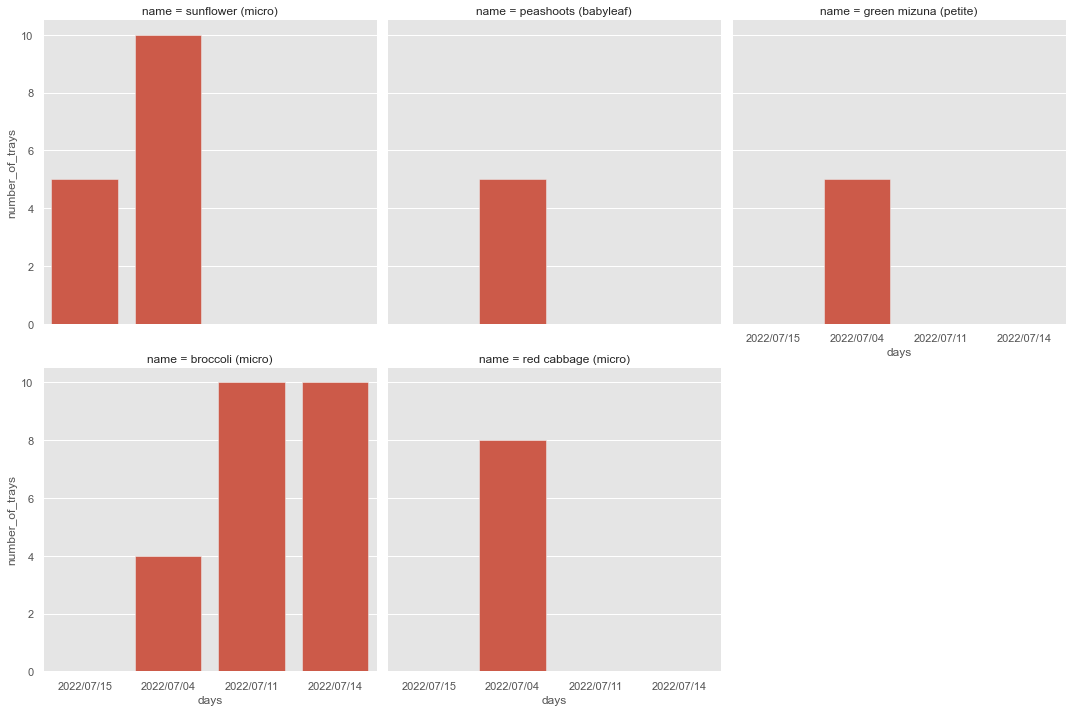

In [2]:
df['days'] = df['event_time'].map(lambda x: x.strftime('%Y/%m/%d'))
palette = itertools.cycle(sns.color_palette())
g = sns.catplot(data=df, x='days', y='number_of_trays', col='name', col_wrap=3, kind='bar', color=next(palette))


# More exploration, but making up data for testing

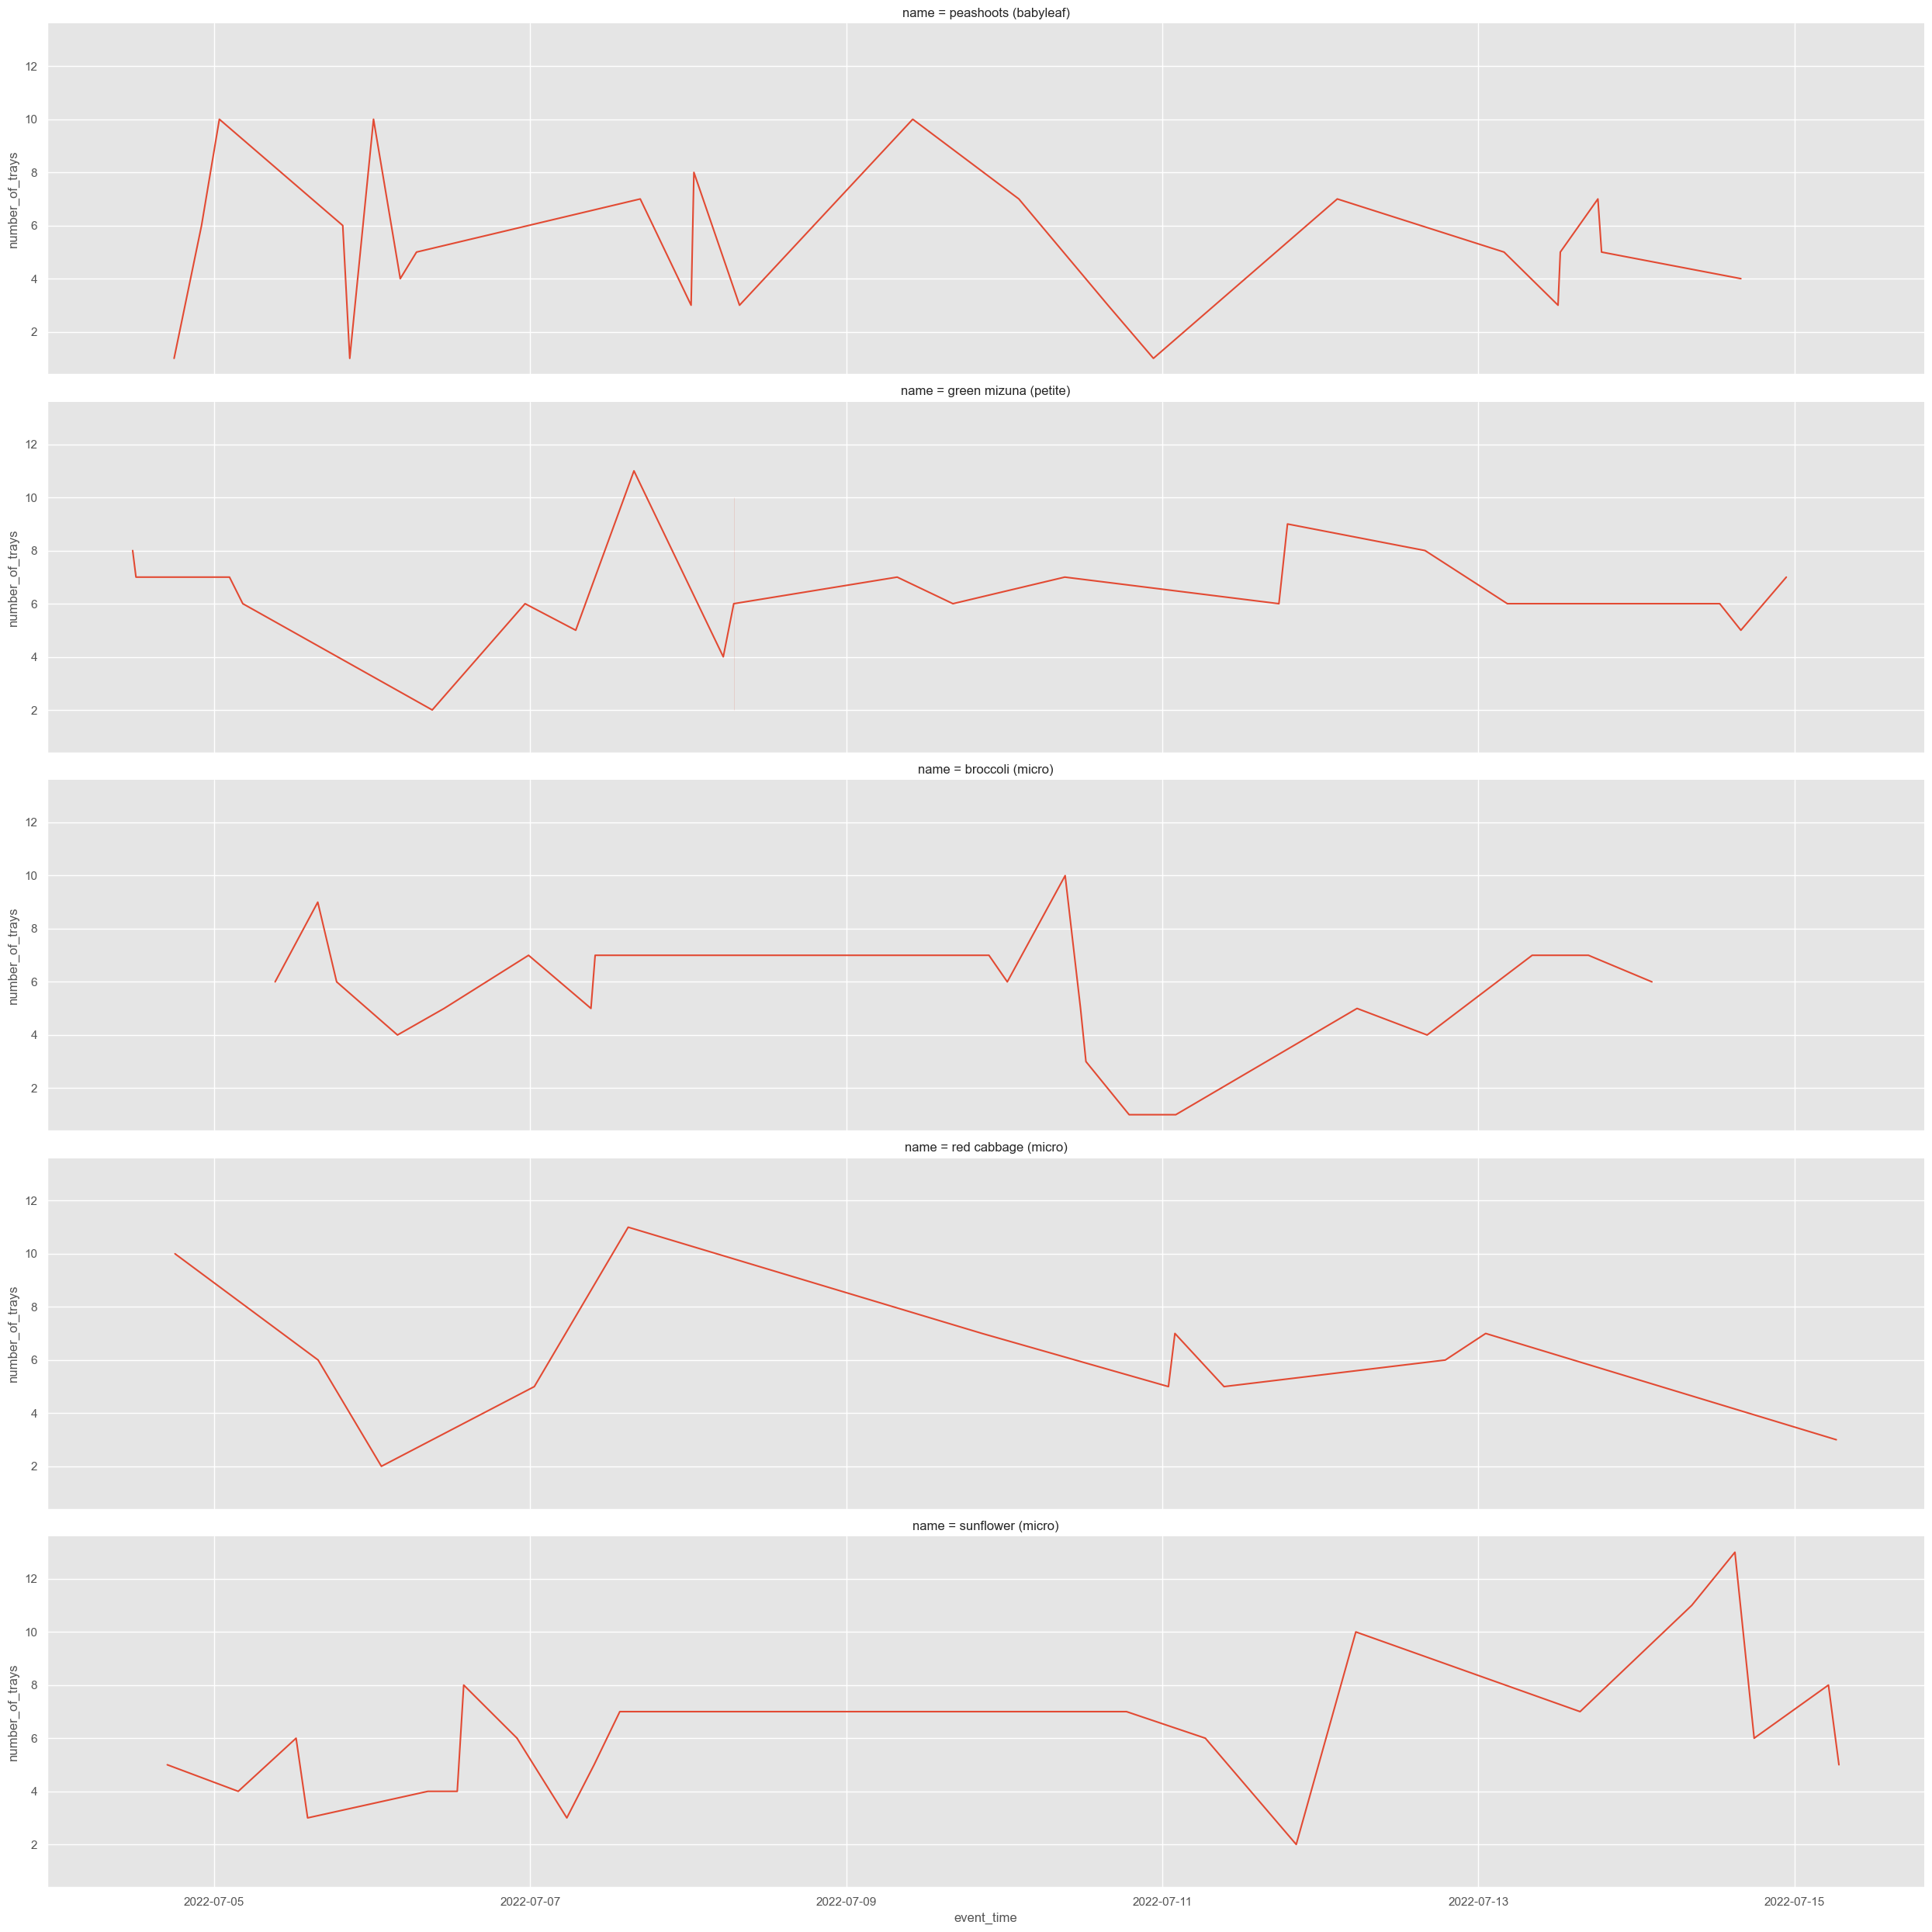

In [3]:
df = get_synth_data(df)
df['days'] = df['event_time'].map(lambda x: x.strftime('%m/%d'))
#palette = itertools.cycle(sns.color_palette())
g = sns.FacetGrid(df,  col='name', col_wrap=1, aspect=5, height=5)
g.map(sns.lineplot, "event_time", 'number_of_trays')


## Issues with this kinda data vis

Instantly we can see the issue of expanding with more dates, it becomes
difficult to read? 

Might be a better idea to use either line plots or perhaps individual species
plots rather than one for all? 

Minor note, issue with the synth data generation: should there be error bars for
N trays? 



## Alternatively useful information to graph?

### Plot yield over time? 
- Actually, scratch that drop downs are easier so you can just select which
  traits to observe over time. 


Dropdown(description='Variable', options=('crop_yield', 'number_of_trays', 'over_production', 'waste_defect', …

Dropdown(description='Species', index=1, options=('peashoots (babyleaf)', 'green mizuna (petite)', 'broccoli (…

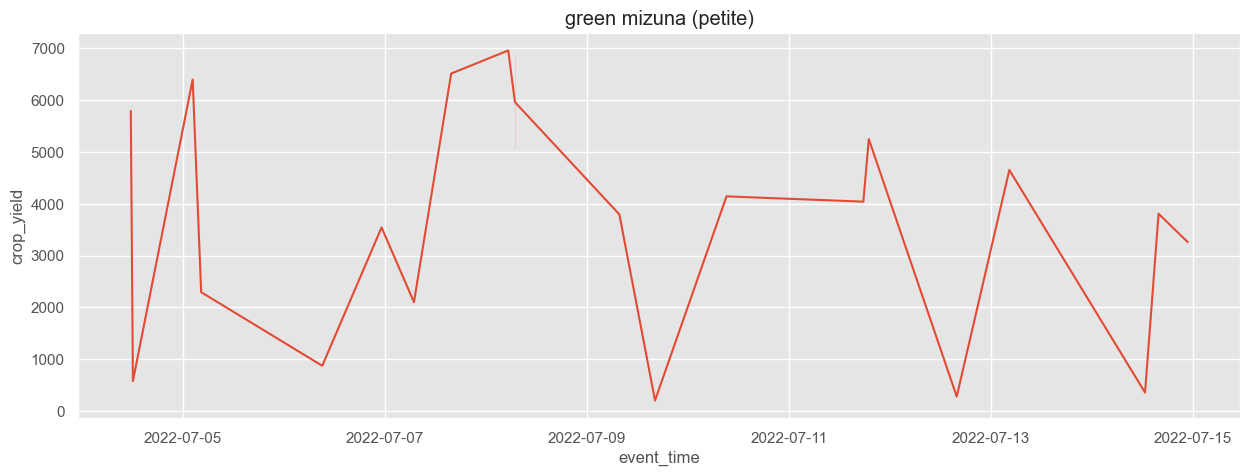

In [4]:
from IPython.display import display, clear_output
import ipywidgets as widgets

available_cols = ['crop_yield', 'number_of_trays','over_production', 'waste_defect', 'waste_disease']
_y = available_cols[0]

l1 = widgets.Dropdown(
    options=available_cols,
    value = _y,
    description='Variable',
)

_name = df['name'].unique()[0]

l2 = widgets.Dropdown(options=df['name'].unique(), value = _name, description='Species')

display(l1, l2)

fig, ax = plt.subplots(1, figsize=(15,5), dpi=100)
sns.lineplot(data=df[df['name'] == _name], x='event_time', y=_y, ax=ax)
ax.set_title(_name)





def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        _y = l1.value
        _name = l2.value
        display(l1,l2)
        fig, ax = plt.subplots(1, figsize=(15,5), dpi=100)
        ax.set_title(_name)
        sns.lineplot(data=df[df['name'] == _name], x='event_time', y=_y, ax=ax)

l1.observe(on_change)
l2.observe(on_change)